# Capturing the sentiment in a movie review

Dataset link: https://www.kaggle.com/c/si650winter11/data

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
train_ds = pd.read_csv("C:\\Users\\Sachin acharya\\Downloads\\Codes-Data-Files\\Machine Learning (Codes and Data Files)\\Data\\sentiment_train",delimiter='\t')
train_ds.head()

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,"this was the first clive cussler i've ever read, but even books like Relic, and Da Vinci code were more plausible than this."
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly didn't seem to hold it's own.


In [48]:
pd.set_option('max_colwidth',800)

In [49]:
train_ds[train_ds.sentiment == 1].head()

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,"this was the first clive cussler i've ever read, but even books like Relic, and Da Vinci code were more plausible than this."
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly didn't seem to hold it's own.


In [50]:
train_ds[train_ds.sentiment == 0].head()

,sentiment,text
3943,0,da vinci code was a terrible movie.
3944,0,"Then again, the Da Vinci code is super shitty movie, and it made like 700 million."
3945,0,"The Da Vinci Code comes out tomorrow, which sucks."
3946,0,i thought the da vinci code movie was really boring.
3947,0,"God, Yahoo Games has this truly-awful looking Da Vinci Code-themed skin on it's chessboard right now."


# Exploratory Data Analysis

In [51]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6918 entries, 0 to 6917
Data columns (total 2 columns):
sentiment    6918 non-null int64
text         6918 non-null object
dtypes: int64(1), object(1)
memory usage: 108.2+ KB


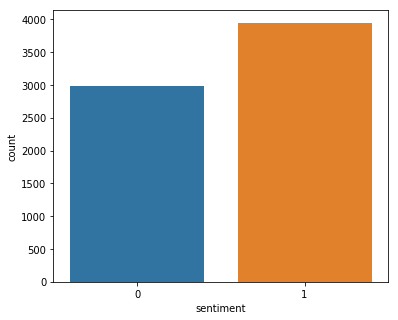

In [52]:
plt.figure(figsize=(6,5))
ax = sns.countplot(x = 'sentiment',data=train_ds)

In [53]:
train_ds.sentiment.value_counts()

1    3943
0    2975
Name: sentiment, dtype: int64

From the countplot, we get to know that there are 3943 positive comments and 2975 negative comments. The distribution of sentiment is more or less equal.

# Creating the count vectors for sentiment in the corpus

In [54]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
feature_vector = count_vectorizer.fit(train_ds.text)
features = feature_vector.get_feature_names()
print('Total number of features: ',len(features))

Total number of features:  2132


The total number of unique words in the dataset(corpus) is 2132

In [55]:
train_ds_features = count_vectorizer.transform(train_ds.text)
train_ds_features.shape

(6918, 2132)

Now the complete document has been converted into a dataframe which contains the count matrix

In [56]:
train_ds_features.getnnz()

65398

There are 65398 non-zero columns among the features

In [57]:
print('Density of the matrix: ',train_ds_features.getnnz()*100/(train_ds_features.shape[0]*train_ds_features.shape[1]))

Density of the matrix:  0.4434010415225908


With the density we can say that the matrix is very sparse. It will filled with non zero values less than 1% and 99% are filled with zero values.

# Removing low frequency words

In [58]:
#summing up the occurrences of features column-wise
features_counts = np.sum(train_ds_features.toarray(),axis = 0)
features_counts_df = pd.DataFrame(dict(features = features,counts = features_counts))

Text(0, 0.5, 'Density')

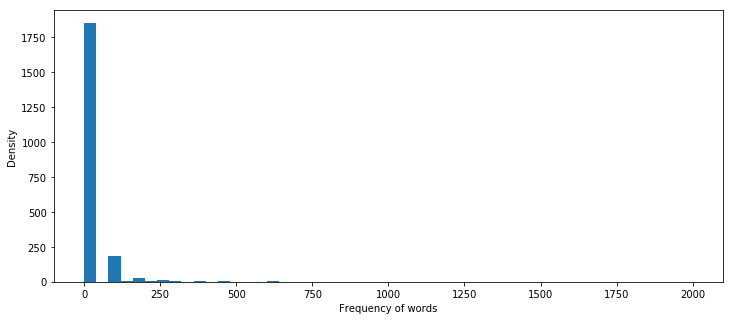

In [59]:
plt.figure(figsize=(12,5))
plt.hist(features_counts_df.counts,bins=50,range=(0,2000))
plt.xlabel('Frequency of words')
plt.ylabel('Density')

The occurance of each word is analyzed using Histogram and occurance of each word is calculated.

The histogram shows that a large number of words have a very few occurances

In [60]:
#finding the number of words which have only one occurance
len(features_counts_df[features_counts_df.counts == 1])

1228

There are 1228 words in the corpus which have only 1 occurance

In [61]:
#we can restrict the max features to 1000 to ignore the words with less occurances
count_vectorizer = CountVectorizer(max_features=1000)
feature_vector = count_vectorizer.fit(train_ds.text)
features = feature_vector.get_feature_names()

In [62]:
train_ds_features = count_vectorizer.transform(train_ds.text)
train_ds_features.shape

(6918, 1000)

In [63]:
features_counts = np.sum(train_ds_features.toarray(),axis = 0)
features_counts_df = pd.DataFrame(dict(features = features,counts = features_counts))

In [64]:
features_counts_df.sort_values('counts',ascending = False).head(15)

,features,counts
866,the,3306
37,and,2154
358,harry,2093
675,potter,2093
138,code,2002
934,vinci,2001
178,da,2001
528,mountain,2000
104,brokeback,2000
488,love,1624


The words like 'The','is','was','and' are not helpful for our analysis. So they can be considered as stop words and can be removed.

In [65]:
from sklearn.feature_extraction import text 
my_stop_words = text.ENGLISH_STOP_WORDS

In [66]:
# Adding few more words from the corpus which can be considered as stop words
my_stop_words = text.ENGLISH_STOP_WORDS.union(['harry','potter','da','code','vinci','mountain','movie','movies'])

In [67]:
#we can restrict the max features to 1000 to ignore the stop words
count_vectorizer = CountVectorizer(stop_words = my_stop_words, max_features=1000)
feature_vector = count_vectorizer.fit(train_ds.text)
features = feature_vector.get_feature_names()

In [68]:
train_ds_features = count_vectorizer.transform(train_ds.text)
train_ds_features.shape

(6918, 1000)

In [69]:
features_counts = np.sum(train_ds_features.toarray(),axis = 0)
features_counts_df = pd.DataFrame(dict(features = features,counts = features_counts))

In [70]:
features_counts_df.sort_values('counts',ascending = False).head(15)

,features,counts
73,brokeback,2000
408,love,1624
39,awesome,1127
436,mission,1094
341,impossible,1093
390,like,974
745,sucks,602
743,sucked,600
297,hate,578
652,really,374


# Stemming

In [76]:
from nltk.stem.snowball import PorterStemmer

stemmer = PorterStemmer()
analyzer = CountVectorizer().build_analyzer()


In [93]:
def stemmed_words (doc):
    stemmed_words = [stemmer.stem(w) for w in analyzer(doc)]
    non_stop_words = [word for word in stemmed_words if word not in my_stop_words]
    return non_stop_words

In [95]:
count_vectorizer = CountVectorizer(analyzer = stemmed_words,max_features=1000)
feature_vector = count_vectorizer.fit(train_ds.text)
train_ds_features = count_vectorizer.transform(train_ds.text)
features = feature_vector.get_feature_names()
features_counts = np.sum(train_ds_features.toarray(),axis = 0)
feature_counts = pd.DataFrame(dict(features = features,counts =features_counts))
feature_counts.sort_values('counts',ascending = False).head(15)

,features,counts
303,harri,2093
83,brokeback,2000
414,love,1883
791,suck,1484
922,wa,1176
400,like,1155
447,movi,1149
45,awesom,1130
441,mission,1094
351,imposs,1093


now most of the non-stop words are stemmed to their root words.

# Distribution of words across different sentiment

In [96]:
train_ds_df = pd.DataFrame(train_ds_features.todense())
train_ds_df.columns = features
train_ds_df['sentiment'] = train_ds.sentiment

# Building the classification model 

In [97]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(train_ds_features,train_ds.sentiment,test_size = 0.3)

In [100]:
from sklearn.naive_bayes import BernoulliNB

nb_clf = BernoulliNB()
nb_clf.fit(train_x.toarray(),train_y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [101]:
test_ds_predicted = nb_clf.predict(test_x.toarray())

In [102]:
from sklearn import metrics
print(metrics.classification_report(test_y,test_ds_predicted))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       890
           1       0.98      0.99      0.99      1186

   micro avg       0.98      0.98      0.98      2076
   macro avg       0.98      0.98      0.98      2076
weighted avg       0.98      0.98      0.98      2076



The model is predicting with very high accuracy. Both average precision and recall is 98%

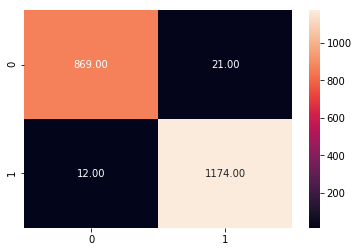

In [104]:
from sklearn import metrics
cm = metrics.confusion_matrix(test_y,test_ds_predicted)
sns.heatmap(cm,annot = True,fmt = '.2f')

The model is making 21 negative misclassification and 12 positive misclassification